# Neste projeto foi analisado um banco de dados contendo espetros de LC-MS (C18 UPLC-ESI/MS/MS) de pacientes: grupo 1-Voluntários saudáveis (n=10), grupo 2- Mortes por COVID-19 (n=36), grupo 3-COVID-19 severa (n=22), COVID-19 leve (n = 28). 
#O Objetivo é desenvolver um modelo de machine learning para predição do severidade de COVID-19 e identificar biomarcadores associados a essa gravidade, com vista com vista a otimizar a prioridade nos atendimento e na gestão leitos hospitalares.

# Referência: PMID: 35751188
https://github.com/AlexandreCOBRE/code


In [ ]:
# Tarefa a ser executada
# Passo 1: Importar o banco de dados
# Passo 2: Importar a biblioteca Pandas para ajudar a manipular o banco de dados 
# Passo 3: Remover colunas desnecessárias
# Passo 4: Instalando a biblioteca Pycaret (ajuda a realizar o Auto-Machine Learn)
# Passo 5: Importando a biblioteca Pycaret
# Passo 6: realizando o Pré-processamento dos dados
# Passo 7: Construindo e comparando diversos modelos
# Passo 8: Treinando o melhor modelo com base nas métricas de desempenho preditivo
# Passo 9: Extraindo os resultados das métricas do modelo
# Passo 10: Conclusoes sobre o modelo
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)

In [ ]:
# Passo 1: Importar o banco de dados

from google.colab import files
uploaded = files.upload()

Saving dados.xlsx to dados (1).xlsx


In [ ]:
# Passo 2: Importar a biblioteca Pandas para ajudar a manipular o banco de dados 
import pandas as pd
df1 = pd.read_excel("dados.xlsx")
display (df1)

Sample     ID  Allantoin  Pyrroloquinoline Quinone  \
0   Voluntário saudável     H1   40423000                    494400   
1   Voluntário saudável     H2   40077000                    535590   
2   Voluntário saudável     H3   33226000                    315240   
3   Voluntário saudável     H4    1625400                    361050   
4   Voluntário saudável     H5   22814000                    386310   
..                  ...    ...        ...                       ...   
91        COVID-19 leve  M10T2    4132700                    299260   
92        COVID-19 leve  M11T2     285160                    285700   
93        COVID-19 leve  M12T2    2205700                    241040   
94        COVID-19 leve  M13T2     317180                    510000   
95        COVID-19 leve  M14T2     391640                    576940   

    Citric Acid  L-Malic Acid  Succinic Acid  Cis-Aconitic Acid  Pyruvic Acid  \
0       2344600       1036800       190300.0            3981.40        3810.3   
1       2870700       1058500       117140.0           12350.00        3583.8   
2       2441600        283650       135120.0            7927.50       14904.0   
3       3732200       4261400       165610.0            5704.50       51089.0   
4       4460900       2153400       160930.0            4350.60        3018.3   
..          ...           ...            ...                ...           ...   
91      3648800         19193       216790.0            4283.90        1355.4   
92      5476300        205090        91971.0            1405.90        4052.8   
93      7381600        160100        62398.0             802.14        9232.7   
94      4432900        139750       123190.0             403.97       15618.0   
95      9015300         74533        71099.0           11065.00       31440.0   

    Citramalic Acid  ...  Cytidine 5'-Diphosphocholine  Methionyl-Glutamate  \
0           1332900  ...                       38072.0               171670   
1           2855800  ...                       24823.0               243740   
2            427840  ...                       26479.0                78218   
3            629370  ...                       25481.0                57936   
4            322760  ...                       33308.0               158510   
..              ...  ...                           ...                  ...   
91            26954  ...                       30055.0                53561   
92            71004  ...                       24887.0                32045   
93            54834  ...                       23604.0               302510   
94            37568  ...                       22643.0                83332   
95            26421  ...                       21286.0               182920   

    N-Methyl-D-Aspartic Acid  N-Acetylasparagine  Phosphocholine  \
0                      49391              728950        13956000   
1                      52009              457990        13813000   
2                      21668              471710        11921000   
3                      32474              143100        12105000   
4                      30693              195320        12809000   
..                       ...                 ...             ...   
91                     46873               43141        13549000   
92                     94288              193910        10585000   
93                    100890               37642        10368000   
94                     43920               52005        15508000   
95                     65819               65870        14763000   

    5-Dihydroxypyridine  L-Methionine Sulfoximine  \
0                164840                   34880.0   
1                156650                  603440.0   
2                 66503                   74937.0   
3                113330                  457290.0   
4                151510                   11408.0   
..                  ...                       ...   
91               101890                   31201.0   
9

In [ ]:
# Passo 3: Remover colunas desnecessárias
df2 = df1.drop("ID", axis = 1)
df2 = df2.drop("Allantoin", axis = 1)

In [ ]:
display(df2)

Sample  Pyrroloquinoline Quinone  Citric Acid  L-Malic Acid  \
0   Voluntário saudável                    494400      2344600       1036800   
1   Voluntário saudável                    535590      2870700       1058500   
2   Voluntário saudável                    315240      2441600        283650   
3   Voluntário saudável                    361050      3732200       4261400   
4   Voluntário saudável                    386310      4460900       2153400   
..                  ...                       ...          ...           ...   
91        COVID-19 leve                    299260      3648800         19193   
92        COVID-19 leve                    285700      5476300        205090   
93        COVID-19 leve                    241040      7381600        160100   
94        COVID-19 leve                    510000      4432900        139750   
95        COVID-19 leve                    576940      9015300         74533   

    Succinic Acid  Cis-Aconitic Acid  Pyruvic Acid  Citramalic Acid  \
0        190300.0            3981.40        3810.3          1332900   
1        117140.0           12350.00        3583.8          2855800   
2        135120.0            7927.50       14904.0           427840   
3        165610.0            5704.50       51089.0           629370   
4        160930.0            4350.60        3018.3           322760   
..            ...                ...           ...              ...   
91       216790.0            4283.90        1355.4            26954   
92        91971.0            1405.90        4052.8            71004   
93        62398.0             802.14        9232.7            54834   
94       123190.0             403.97       15618.0            37568   
95        71099.0           11065.00       31440.0            26421   

    DL-o-Tyrosine  D-Malic acid  ...  Cytidine 5'-Diphosphocholine  \
0         1145500        483070  ...                       38072.0   
1         1371300        397580  ...                       24823.0   
2          941390        340370  ...                       26479.0   
3          888610        439320  ...                       25481.0   
4         1748400        511580  ...                       33308.0   
..            ...           ...  ...                           ...   
91        1787100        614470  ...                       30055.0   
92         960060        423550  ...                       24887.0   
93        1543500        384540  ...                       23604.0   
94         977480        381240  ...                       22643.0   
95        1930200        337620  ...                       21286.0   

    Methionyl-Glutamate  N-Methyl-D-Aspartic Acid  N-Acetylasparagine  \
0                171670                     49391              728950   
1                243740                     52009              457990   
2                 78218                     21668              471710   
3                 57936                     32474              143100   
4                158510                     30693              195320   
..                  ...                       ...                 ...   
91                53561                     46873               43141   
92                32045                     94288              193910   
93               302510                    100890               37642   
94                83332                     43920               52005   
95               182920                     65819               65870   

    Phosphocholine  5-Dihydroxypyridine  L-Methionine Sulfoximine  \
0         13956000               164840                   34880.0   
1         13813000               156650                  603440.0   
2         11921000                66503                   74937.0   
3         12105000               113330                  457290.0   
4         12809000               151510                   11408.0   
..             ...                  ...                       ...   
91

In [ ]:
# Passo 4: Instalando a biblioteca Pycaret (ajuda a realizar o Auto-Machine Learn)
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Passo 5: Importando a biblioteca Pycaret

from pycaret import classification


In [ ]:
# Passo 6: realizando o Pré-processamento dos dados
classification_setup = classification.setup(data = df2, target = "Sample")

Description  \
0                               session_id   
1                                   Target   
2                              Target Type   
3                            Label Encoded   
4                            Original Data   
5                           Missing Values   
6                         Numeric Features   
7                     Categorical Features   
8                         Ordinal Features   
9                High Cardinality Features   
10                 High Cardinality Method   
11                   Transformed Train Set   
12                    Transformed Test Set   
13                      Shuffle Train-Test   
14                     Stratify Train-Test   
15                          Fold Generator   
16                             Fold Number   
17                                CPU Jobs   
18                                 Use GPU   
19                          Log Experiment   
20                         Experiment Name   
21                                     USI   
22                         Imputation Type   
23          Iterative Imputation Iteration   
24                         Numeric Imputer   
25      Iterative Imputation Numeric Model   
26                     Categorical Imputer   
27  Iterative Imputation Categorical Model   
28           Unknown Categoricals Handling   
29                               Normalize   
30                        Normalize Method   
31                          Transformation   
32                   Transformation Method   
33                                     PCA   
34                              PCA Method   
35                          PCA Components   
36                     Ignore Low Variance   
37                     Combine Rare Levels   
38                    Rare Level Threshold   
39                         Numeric Binning   
40                         Remove Outliers   
41                      Outliers Threshold   
42                Remove Multicollinearity   
43             Multicollinearity Threshold   
44             Remove Perfect Collinearity   
45                              Clustering   
46                    Clustering Iteration   
47                     Polynomial Features   
48                       Polynomial Degree   
49                    Trignometry Features   
50                    Polynomial Threshold   
51                          Group Features   
52                       Feature Selection   
53                Feature Selection Method   
54            Features Selection Threshold   
55                     Feature Interaction   
56                           Feature Ratio   
57                   Interaction Threshold   
58                           Fix Imbalance   
59                    Fix Imbalance Method   

                                                Value  
0                                                4680  
1                                              Sample  
2                                          Multiclass  
3   COVID-19 grave: 0, COVID-19 leve: 1, Morte por...  
4                                           (96, 431)  
5                                               False  
6                                                 430  
7                                                   0  
8                                               False  
9                                               False  
10                                               None  
11                                          (67, 425)  
12                                          (29, 425)  
13                                               True  
14                                              False  
15                                    StratifiedKFold  
16                                                 10  
17                                                 -1  
18                                              False  
19                                              False  
20                                   clf-default

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Sample',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
# Passo 7: Construindo e comparando diversos modelos
modelos = classification.compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8595  0.6781  0.8292  0.8405   
et                 Extra Trees Classifier    0.8333  0.6571  0.7708  0.7722   
knn                K Neighbors Classifier    0.7500  0.6542  0.7250  0.7980   
gbc          Gradient Boosting Classifier    0.7429  0.6495  0.7167  0.7242   
dt               Decision Tree Classifier    0.7310  0.5767  0.7042  0.6841   
rf               Random Forest Classifier    0.7286  0.6581  0.6708  0.6713   
lightgbm  Light Gradient Boosting Machine    0.7167  0.6171  0.6542  0.6713   
lda          Linear Discriminant Analysis    0.6929  0.6436  0.6167  0.6499   
nb                            Naive Bayes    0.6738  0.6346  0.6667  0.7234   
svm                   SVM - Linear Kernel    0.6405  0.0000  0.6042  0.5516   
ada                  Ada Boost Classifier    0.6214  0.6196  0.6083  0.6075   
ridge                    Ridge Classifier    0.5857  0.0000  0.5667  0.5833   
qda       Quadratic Discriminant Analysis    0.4500  0.4225  0.4667  0.4244   
dummy                    Dummy Classifier    0.3857  0.3500  0.2750  0.1517   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8392  0.7914  0.8044     0.253  
et        0.7884  0.7514  0.7795     0.132  
knn       0.7392  0.6490  0.6788     0.089  
gbc       0.7081  0.6238  0.6570     1.631  
dt        0.6895  0.6129  0.6530     0.030  
rf        0.6739  0.5943  0.6363     0.258  
lightgbm  0.6744  0.5798  0.6095     0.152  
lda       0.6500  0.5431  0.5709     0.020  
nb        0.6812  0.5431  0.5697     0.057  
svm       0.5769  0.4955  0.5495     0.024  
ada       0.5882  0.4708  0.5022     0.136  
ridge     0.5556  0.4060  0.4426     0.022  
qda       0.4065  0.2490  0.2819     0.025  
dummy     0.2170  0.0000  0.0000     0.010

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4680, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
# Passo 8: Treinando o melhor modelo com base nas métricas de desempenho preditivo
# Nota: O modelo Logistic Regression foi o melhor. Agora, Criaremos e validaremos o modelo Logistic Regression
modelo_lr = classification.create_model("lr")

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8571  0.9714  0.7500  0.7619  0.8000  0.7879  0.8141
2       0.7143  0.8857  0.6250  0.7143  0.7143  0.5882  0.5882
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8571  0.9238  0.7500  0.7619  0.8000  0.7879  0.8141
7       0.8333  0.0000  0.8333  0.8889  0.8222  0.7500  0.7833
8       0.8333  0.0000  0.8333  0.8889  0.8222  0.7500  0.7833
9       0.5000  0.0000  0.5000  0.3889  0.4333  0.2500  0.2611
Mean    0.8595  0.6781  0.8292  0.8405  0.8392  0.7914  0.8044
Std     0.1519  0.4454  0.1671  0.1840  0.1695  0.2263  0.2227

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4680, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# Passo 9: Extraindo os resultados das métricas do modelo
# General evaluation
classification.evaluate_model(modelo_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4680, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

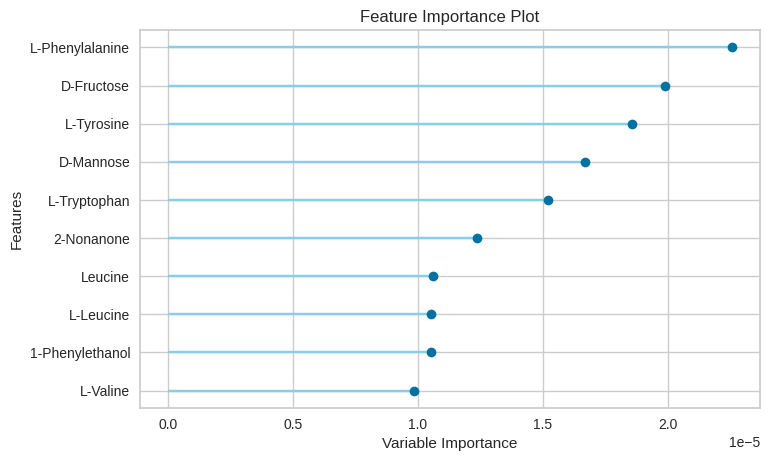

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Plotando apenas os TOP 10 biomarcadoers mais importantes
classification.plot_model(modelo_lr, plot ="feature")

In [ ]:
# Passo 10: Conclusoes sobre o modelo
# Diversos Modelos de machine learning foram construidos para a predição do diagnóstico de COVID-19 usando dados de LC-MS de pacientes COVID-19
# O modelo de regressão logística foi o que apresentou melhor desempenho preditivo
#  Os top 5 biomarcadores mais importantes para o diagnóstico de COVID-19 foram:L-Phenyl-Alanine, D-fructose, L-Thyrosine, D-manose e L-Thriptofano  
# O próximo passo é desenvoler o App para que o modelo seja utilizado nas Unidados de saúde com vista a otimizar a prioridade nos atendimento e da gestão leitos hospitalares. 

In [ ]:
# Passo 11: Salvando o modelo para realizar predições na vida real (Deploy)
classification.save_model(modelo_lr, "melhor_modelo_LR")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4680, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=melhor_modelo_LR, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Sample',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                         

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Sample',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 